### Setup

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score, confusion_matrix, classification_report, log_loss, auc, roc_curve
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [337]:
data = pd.read_csv('data/clean_data.csv')

data.head(2)

,id,age,monthly_income,collateral_value,loan_amount,state,collateral_debt,verified_restriction,dishonored_checks,expired_debts,...,pre_approved,form_completed,sent_to_analysis,channel,zip_code,landing_page,landing_page_product,gender,utm_term,education_level
0,173460,52,5668.0,24000.0,5000.0,SP,900.0,0.0,0,0,...,1,0,0,search,4028XXXX,/emprestimos/solicitar,PersonalLoan,female,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
1,173455,20,5000.0,14200.0,5000.0,SP,1500.0,0.0,0,0,...,1,0,0,direct,7060XXXX,/emprestimos,NaN,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."


### Model
<b> Train and Test</b>

In [338]:
x = data[['age', 'monthly_income', 'collateral_value', 'loan_amount', 'form_completed']]
y = data['sent_to_analysis']

x = preprocessing.StandardScaler().fit(x).transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

print('Train samples: ', x_train.shape[0])
print('Test samples: ', x_test.shape[0])

Train samples:  9340
Test samples:  2335


<b>Model</b>

In [339]:
log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)

yhat = log_regression.predict(x_test)
yhat_probability = log_regression.predict_proba(x_test)

<b>Evaluation</b>

Jaccard

In [340]:
jaccard_similarity_score(y_test, yhat)

0.7910064239828694

Confussion Matrix

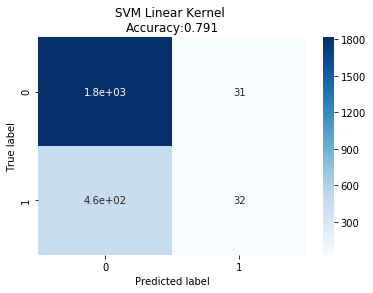

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1846
           1       0.51      0.07      0.12       489

   micro avg       0.79      0.79      0.79      2335
   macro avg       0.65      0.52      0.50      2335
weighted avg       0.74      0.79      0.72      2335



array([[1815,   31],
       [ 457,   32]], dtype=int64)

In [341]:
con_matrix = confusion_matrix(y_test, yhat)

sns.heatmap(con_matrix,
            annot=True,
            cmap="Blues")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, yhat)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print (classification_report(y_test, yhat))

con_matrix

Log Loss

In [342]:
log_loss(y_test, yhat_probability)

0.4786003188424194